In [2]:
import numpy as np
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler

In [2]:
def depart(initial_matrix):
    kl = initial_matrix[15:]
    tk = []
    for i in range(113):    
        t = kl[i][20:110]
        tk.append(t)
    return tk

In [3]:
# 源数据处理
all_file = os.listdir('./face/rawdata')
# 读取所有data_x数据,  有问题的数据：第1186个，2412号；第1190个，2416号 ；2021号
data_x = np.zeros((len(all_file),128,128))
data_y = np.zeros(len(all_file))
data1_x = np.zeros((len(all_file),113,90))
# 将两个数据标签整理再一起
f = open('./face/faceDR','r')
r1 = f.readlines()
f.close()

f = open('./face/faceDS','r')
r2 = f.readlines()
f.close()
for i in r2:
    r1.append(i)

# 整理出data_x,和data_y
all_file = os.listdir('./face/rawdata')
for i in range(len(all_file)):
    with open('./face/rawdata/'+all_file[i],'rb') as f:
        x = np.fromfile(f,dtype=np.ubyte)
        t = x.reshape(128,-1)
        data_x[i] = t
        for j in r1:
            if all_file[i] in j:
                if 'female' in j:
                    data_y[i] = 0
                elif 'male' in j:
                    data_y[i] = 1
                else:
                    data_y[i] = None
                break
for i in range(len(all_file)):
    data1_x[i] = depart(data_x[i])
face_data=data1_x.reshape(data1_x.shape[0],-1)#拉长数组
face_target = data_y
#pca = PCA(n_components = 500).fit(face_data)
#face_data = pca.transform(face_data)

X_train,X_test,Y_train,Y_test = train_test_split(face_data,face_target,shuffle = True,random_state=60,test_size = 0.3)

1.0 1.0 0.0 0.0


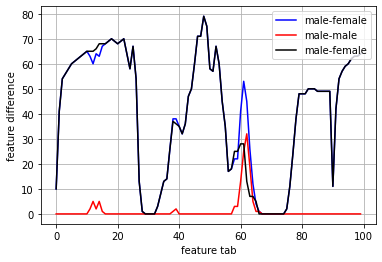

In [18]:
ch1 = [abs(x-y) for x,y in zip(face_data[1000],face_data[3000])]
ch2 = [abs(x-y) for x,y in zip(face_data[1000],face_data[2000])]
ch3 = [abs(x-y) for x,y in zip(face_data[2000],face_data[3000])]
ch4 = [abs(x-y) for x,y in zip(face_data[3400],face_data[3000])]
#plt.plot(range(20),face_data[1000][40:60],color='blue')
#plt.plot(range(20),face_data[2000][40:60],color='black')
#plt.plot(range(20),face_data[3000][40:60],color='red')
print(face_target[1000],face_target[2000],face_target[3000],face_target[3400])
plt.plot(range(100),ch1[0:100],color='blue',label='male-female')
plt.plot(range(100),ch2[0:100],color='red',label='male-male')
plt.plot(range(100),ch3[0:100],color='black',label='male-female')
#plt.plot(range(100),ch4[0:100],color='orange',label='female-female')
plt.legend(loc='upper right')
plt.ylabel('feature difference')
plt.xlabel('feature tab')
plt.grid()
plt.show()

In [6]:
#归一化
mms = MinMaxScaler().fit(X_train)
X_train_ = mms.transform(X_train)
X_test_=mms.transform(X_test)

In [9]:
gnb = GaussianNB().fit(X_train,Y_train) 
mnb = MultinomialNB().fit(X_train,Y_train)
bnb = BernoulliNB().fit(X_train,Y_train) 
cnb = ComplementNB().fit(X_train,Y_train) 

In [8]:

mnb.class_log_prior_

array([-0.92910564, -0.50237269])

In [10]:
acc_score = gnb.score(X_test,Y_test)#高斯分布
acc_score1 = mnb.score(X_test,Y_test)#多项式朴素贝叶斯分类器MultinomialNB
acc_score2 = bnb.score(X_test,Y_test)#伯劳尼朴素贝叶斯分类器BernoulliNB
acc_score3 = cnb.score(X_test,Y_test)
print(acc_score,acc_score1,acc_score2,acc_score3)
#print(acc_score2)

0.6311389759665622 0.6426332288401254 0.6541274817136886 0.6384535005224661


In [7]:
Y_pred = mnb.predict(X_test)
from sklearn.metrics import confusion_matrix as CM
CM(Y_test,Y_pred)

array([[274, 191],
       [173, 557]], dtype=int64)

In [11]:
cv1 = cross_val_score(gnb,face_data,face_target,cv=5)
cv2 = cross_val_score(mnb,face_data,face_target,cv=5)
cv3 = cross_val_score(bnb,face_data,face_target,cv=5)
cv4 = cross_val_score(cnb,face_data,face_target,cv=5)
print(cv1)
print(cv2)
print(cv3)
print(cv4)

[0.5846395  0.60188088 0.55102041 0.68759812 0.65306122]
[0.55172414 0.62695925 0.55572998 0.74411303 0.69701727]
[0.61442006 0.62068966 0.54631083 0.75981162 0.66562009]
[0.55172414 0.62695925 0.55572998 0.74254317 0.68916797]


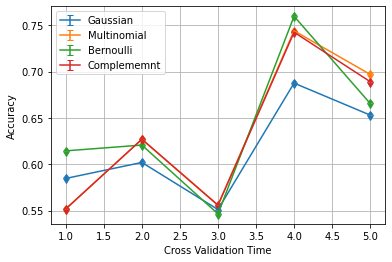

In [18]:
import numpy as np
import matplotlib.pyplot as plt
#各个模型效果对比图

fig = plt.figure()
x = [1,2,3,4,5]
yerr = np.linspace(0.05, 0.2, 5)
plt.errorbar(x, cv1,  yerr=yerr, uplims=True, lolims=True,
             label='Gaussian')
plt.errorbar(x, cv2,  yerr=yerr, uplims=True, lolims=True,
             label='Multinomial')
plt.errorbar(x, cv3,  yerr=yerr, uplims=True, lolims=True,
             label='Bernoulli')
plt.errorbar(x, cv4,  yerr=yerr, uplims=True, lolims=True,
             label='Complememnt')
plt.grid()
plt.xlabel('Cross Validation Time')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [13]:
clf = AdaBoostClassifier(base_estimator=bnb, n_estimators=8)
scores = cross_val_score(clf, face_data,face_target, cv=5, scoring='roc_auc')
print('Adaboost-NB AUC：',scores.mean())

Adaboost-NB AUC： 0.5332381493173186


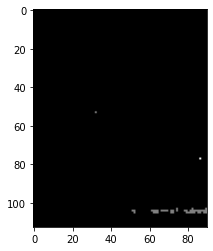

In [17]:
plt.imshow(data1_x[3115],cmap=plt.cm.gray)

plt.show()

In [3]:
help(cross_val_score)

Help on function cross_val_score in module sklearn.model_selection._validation:

cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)
    Evaluate a score by cross-validation
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.
    
    X : array-like of shape (n_samples, n_features)
        The data to fit. Can be for example a list, or an array.
    
    y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
        The target variable to try to predict in the case of
        supervised learning.
    
    groups : array-like of shape (n_samples,), default=None
        Group labels for the samples used while splitting the dataset into
        train/test set. Only used in conjunction with a "Group" :term:`cv`

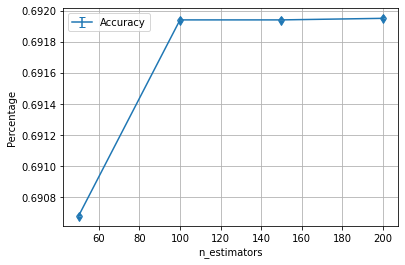

In [7]:
import numpy as np
import matplotlib.pyplot as plt
#各个模型效果对比图

fig = plt.figure()
x = [50,100,150,200]
yerr = np.linspace(0.05, 0.2, 4)
cv1 = [0.743345,0.743544,0.743550,0.743560]
cv2 = [0.69068,0.69194,0.69194,0.69195]
#plt.errorbar(x, cv1,  yerr=yerr, uplims=True, lolims=True,
#             label='AUC_ROC')
plt.errorbar(x, cv2,  yerr=yerr, uplims=True, lolims=True,
             label='Accuracy')

plt.grid()
plt.xlabel('n_estimators')
plt.ylabel('Percentage')
plt.legend(loc='upper left')
plt.show()

In [9]:
k = [[1,2,3],[4,5,6],[7,8,9]]
t = k[:1]+k[1:2]
print(t)

[[1, 2, 3], [4, 5, 6]]
